<a href="https://colab.research.google.com/github/ngupta23/inventory-deterministic/blob/main/Inventory%20Management%20-%20Deterministic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Parameters

### Functions

In [3]:
# Deterministic constant demand
def demand(D):
    return D

In [4]:
# Order every cycle time
def order(t, T, Q):
    # Reorder when t = 1 + k x T 
    if ((t-1) % T)==0 or (t==1): #((t-1) % T)==0
        result = Q
    else:
        result = 0
    return result

In [5]:
# Simulation version 1: with leadtime uncompensated
def sim(Q, T, D_day, T_total, LD):
    df_sim = pd.DataFrame({'time': np.array(range(1, T_total+1))})
    # Demand Function
    df_sim['demand'] = df_sim['time'].apply(lambda t: demand(D_day))
    # Order Function
    df_sim['order'] = df_sim['time'].apply(lambda t: order(t, T, Q))
    # Inventory on Hand = Order - Demand
    df_sim['ioh'] = df_sim['order'].cumsum().shift(LD) - df_sim['demand'].cumsum()

    # Inventory on Hand: Add extra records for the replenishment time at t = k x T - LD (for visualisation)
    df_simp = df_sim[df_sim['time'].apply(lambda t: ((t-LD) % T)==0 and (t!=0 + LD))]
    df_simp['ioh'] = df_simp['ioh'] + Q
    df_sim = pd.concat([df_sim, df_simp]).sort_values(['time', 'ioh'], ascending= [True, True])
    
    # Print Results
    print("Demand during cycle time: {:,} units".format(round(D_day * T, 2)))
    print("Average IOH for {:,} days cycle time: {:,} units".format(T, round(df_sim['ioh'].mean(),2)))
    return df_sim

---

## Initial Rule
#### Parameters

In [6]:
# Total Demand (units/year)
D = 2000
# Total Time (days)
T_total = 365
# Demand per day (unit/day)
D_day = D/T_total
# Cost of product ($/unit)
c = 50
# Cost of placing an order ($/order)
c_t = 500
# Holding Cost (% unit cost per year)
h = .25
c_e = h * c
# Selling Price ($/unit)
p = 75
# Lead Time between ordering and receiving
LD = 0
# Replenishment Period
T = 10
# Order Quantity 1: 0 stock
Q = D_day * T
# Cost of shortage ($/unit)
c_s = 12

#### Simulation

In [7]:
print("LD = {:,} days".format(LD))
df_sim1 = sim(Q, T, D_day, T_total, LD)

LD = 0 days
Demand during cycle time: 54.79 units
Average IOH for 10 days cycle time: 27.53 units


#### Plot

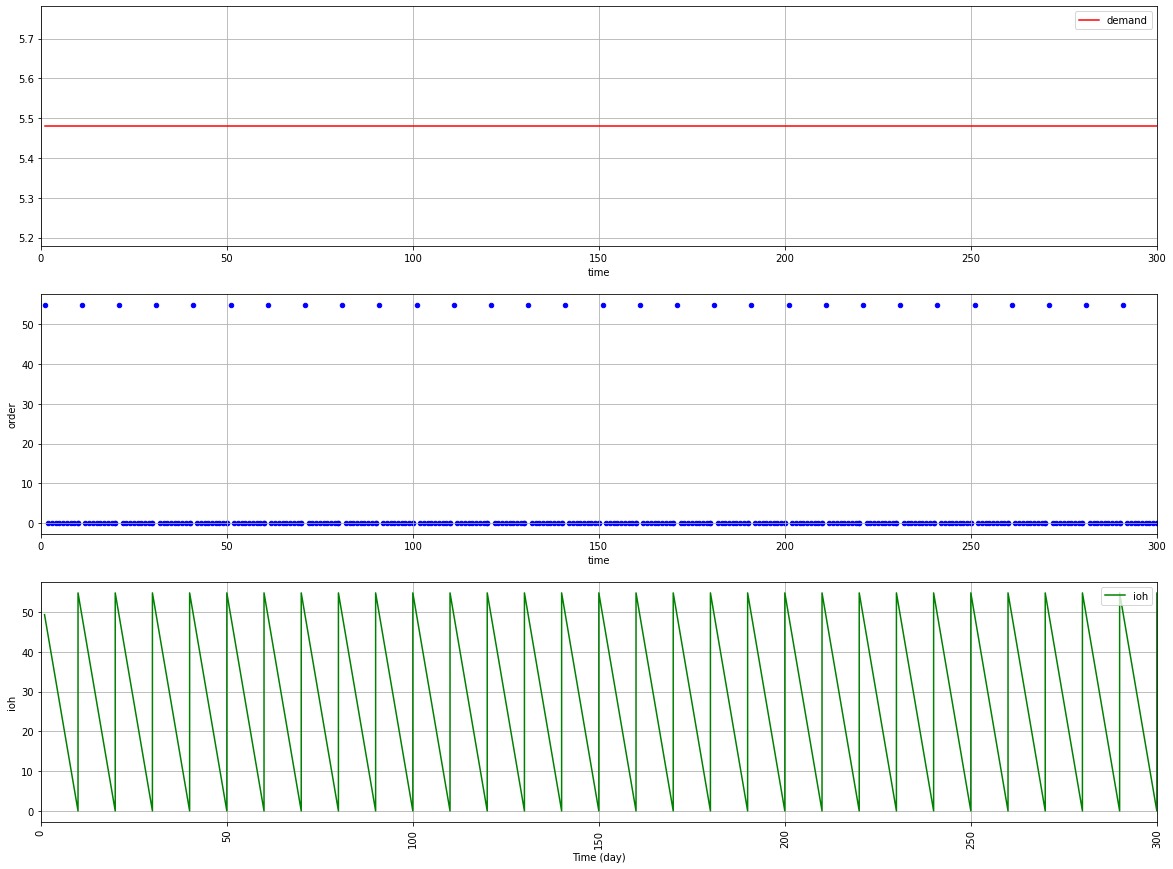

In [8]:
# Plot
figure, axes = plt.subplots(3, 1)

df_sim1.plot(figsize=(20, 12), xlim=[0,300] , x='time', y='demand', ax=axes[0], grid = True, color = 'r')
df_sim1.plot.scatter(figsize=(20, 12), xlim=[0,300], x='time', y='order', ax=axes[1], grid = True, color ='b')
df_sim1.plot(figsize=(20, 15), xlim=[0, 300], x='time', y='ioh', ax=axes[2], grid = True, color = 'g')

plt.xlabel('Time (day)')
plt.ylabel('ioh')
plt.xticks(rotation=90)

plt.show()

In [9]:
df_sim1

,time,demand,order,ioh
0,1,5.479452,54.794521,49.315068
1,2,5.479452,0.000000,43.835616
2,3,5.479452,0.000000,38.356164
3,4,5.479452,0.000000,32.876712
4,5,5.479452,0.000000,27.397260
...,...,...,...,...
360,361,5.479452,54.794521,49.315068
361,362,5.479452,0.000000,43.835616
362,363,5.479452,0.000000,38.356164
363,364,5.479452,0.000000,32.876712
